In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy

In [319]:
dc_re = pd.read_csv('/Users/justinsmith/Documents/GitHub/DC_Properties.csv')

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [320]:
dc_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [321]:
tract_df = pd.read_csv('/Users/justinsmith/Documents/GitHub/raw_census_tracts_in_2010.csv')

In [322]:
dc_re.dropna(subset=['PRICE'], inplace=True)

In [323]:
dc_re = dc_re.drop(columns=['STATE', 'CITY'])

In [324]:
dc_re_resid = dc_re[dc_re['SOURCE'] == 'Residential']

In [325]:
dc_re_condo = dc_re[dc_re['SOURCE'] != 'Residential']

In [327]:
dc_re['diff_yr'] = abs(dc_re['EYB']-dc_re['YR_RMDL'])

In [328]:
dc_1900.shape

(1594, 47)

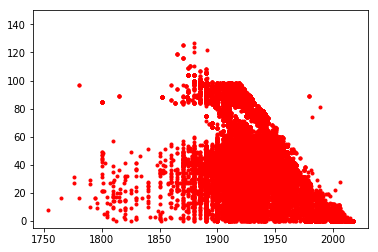

In [329]:
plt.plot(dc_re_drop['AYB'], dc_re_drop['diff_yr'], 'r.')
plt.ylim(ymax=150, ymin=-5)
plt.show()

In [330]:
dc_re_resid['diff_yr'] = abs(dc_re_resid['EYB']- dc_re_resid['YR_RMDL'])
dc_re_condo['diff_yr'] = abs(dc_re_condo['EYB']- dc_re_condo['YR_RMDL'])
dc_re_resid = dc_re_resid.drop(index=56600)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


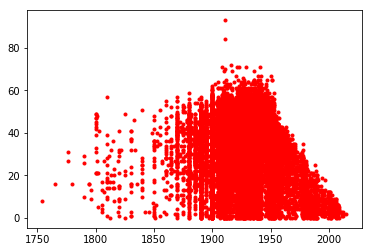

In [331]:
plt.plot(dc_re_resid['AYB'], dc_re_resid['diff_yr'], 'r.')

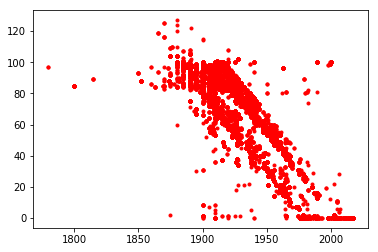

In [332]:
plt.plot(dc_re_condo['AYB'], dc_re_condo['diff_yr'], 'r.')

In [334]:
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,9] == 0:
        dc_re_condo.iloc[i,9] = dc_re_condo.iloc[i,10]

for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,8] == 0:
        dc_re_condo.iloc[i,8] = dc_re_condo.iloc[i,10]

for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,8] > dc_re_condo.iloc[i,10]:
        dc_re_condo.iloc[i,10] = dc_re_condo.iloc[i,8]
        
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,10] > dc_re_condo.iloc[i,9]:
        dc_re_condo.iloc[i,9] = dc_re_condo.iloc[i,10]

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [336]:
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,8] == 0:
        dc_re_resid.iloc[i,8] = dc_re_resid.iloc[i,10]

for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,9]  == 0:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]\
        
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,8] > dc_re_resid.iloc[i,10]:
        dc_re_resid.iloc[i,10] = dc_re_resid.iloc[i,8]
        
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,10] > dc_re_resid.iloc[i,9]:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]

In [348]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57899 entries, 0 to 106695
Data columns (total 48 columns):
Unnamed: 0            57899 non-null int64
BATHRM                57899 non-null int64
HF_BATHRM             57899 non-null int64
HEAT                  57899 non-null object
AC                    57899 non-null object
NUM_UNITS             57899 non-null float64
ROOMS                 57899 non-null int64
BEDRM                 57899 non-null int64
AYB                   57804 non-null float64
YR_RMDL               33216 non-null float64
EYB                   57899 non-null int64
STORIES               57866 non-null float64
SALEDATE              57898 non-null object
PRICE                 57899 non-null float64
QUALIFIED             57899 non-null object
SALE_NUM              57899 non-null int64
GBA                   57899 non-null float64
BLDG_NUM              57899 non-null int64
STYLE                 57899 non-null object
STRUCT                57899 non-null object
GRADE       

In [239]:
# DEALING WITH NULLS AND COLUMNS

# dc_re_resid.dropna(axis=1, how='all', inplace=True)
# dc_re_resid.drop(columns='FULLADDRESS', inplace=True)
# dc_re_resid.drop(columns='CENSUS_BLOCK',inplace=True)
# dc_re_resid.drop(columns='diff_yr',inplace=True)
# dc_re_resid.drop(columns='NATIONALGRID',inplace=True)
# dc_re_resid.drop(columns='ASSESSMENT_SUBNBHD', inplace=True)
# dc_re_resid['AYB'] = dc_re_resid['AYB'].fillna(0)
# dc_re_resid.drop(columns=['X','Y','GIS_LAST_MOD_DTTM','SOURCE'], inplace=True )
# dc_re_resid['YR_RMDL'] = dc_re_resid['YR_RMDL'].fillna(0)

In [305]:
# DEALING WITH DaTA TYPE

dc_re_resid['WARD'] = dc_re_resid['WARD'].str.extract('(\d+)', expand=False)
dc_re_resid['SALEDATE']= pd.to_datetime(dc_re_resid['SALEDATE'])
dc_re_resid['WARD'] = dc_re_resid['WARD'].astype('int')

In [312]:
dc_re_resid['SQUARE'] = dc_re_resid['SQUARE'].str.extract('(\d+)', expand=False)

In [316]:
dc_re_resid['SQUARE'].isnull().sum()

53509

In [313]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57763 entries, 0 to 106695
Data columns (total 37 columns):
Unnamed: 0         57763 non-null int64
BATHRM             57763 non-null int64
HF_BATHRM          57763 non-null int64
HEAT               57763 non-null object
AC                 57763 non-null object
NUM_UNITS          57763 non-null float64
ROOMS              57763 non-null int64
BEDRM              57763 non-null int64
AYB                57763 non-null float64
YR_RMDL            57763 non-null float64
EYB                57763 non-null int64
STORIES            57763 non-null float64
SALEDATE           57763 non-null datetime64[ns]
PRICE              57763 non-null float64
QUALIFIED          57763 non-null object
SALE_NUM           57763 non-null int64
GBA                57763 non-null float64
BLDG_NUM           57763 non-null int64
STYLE              57763 non-null object
STRUCT             57763 non-null object
GRADE              57763 non-null object
CNDTN              5776

In [294]:
dc_re_resid['SALEDATE']  = pd.to_datetime(dc_re_resid['SALEDATE']).dt.date

In [295]:
dc_re_resid.loc[:,'SALEDATE']

0         2003-11-25
2         2016-06-21
3         2006-07-12
5         2010-02-26
7         2011-09-29
8         2018-05-03
14        2011-09-30
16        2010-11-04
19        2001-07-23
20        2016-01-12
22        2006-01-09
23        2012-08-21
24        2012-07-25
25        1996-04-02
27        2005-04-06
29        2013-12-11
32        1999-03-30
37        1997-10-20
40        2006-08-28
41        2016-09-14
42        2015-09-16
43        2018-03-30
44        2017-05-01
45        2001-11-08
46        2011-03-18
48        1999-12-03
50        2009-10-05
52        2006-08-08
54        1997-09-26
55        2004-12-20
             ...    
106630    1993-10-01
106631    2010-08-31
106632    2008-02-13
106633    1998-01-29
106637    1993-11-18
106638    1997-10-08
106641    2018-06-15
106642    2009-11-25
106645    2012-04-23
106646    2005-11-14
106650    2016-09-14
106651    1995-01-04
106653    2007-03-28
106654    2008-06-17
106656    2014-05-27
106657    2008-09-26
106662    200

In [297]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57763 entries, 0 to 106695
Data columns (total 37 columns):
Unnamed: 0         57763 non-null int64
BATHRM             57763 non-null int64
HF_BATHRM          57763 non-null int64
HEAT               57763 non-null object
AC                 57763 non-null object
NUM_UNITS          57763 non-null float64
ROOMS              57763 non-null int64
BEDRM              57763 non-null int64
AYB                57763 non-null float64
YR_RMDL            57763 non-null float64
EYB                57763 non-null int64
STORIES            57763 non-null float64
SALEDATE           57763 non-null object
PRICE              57763 non-null float64
QUALIFIED          57763 non-null object
SALE_NUM           57763 non-null int64
GBA                57763 non-null float64
BLDG_NUM           57763 non-null int64
STYLE              57763 non-null object
STRUCT             57763 non-null object
GRADE              57763 non-null object
CNDTN              57763 non-nu

In [263]:
dc_re_resid.dropna(inplace=True)

In [360]:
for i in range(len(dc_re_resid)):
        re.sub('[^0-9]','', dc_re_resid[i][35])

KeyError: 0

In [285]:
dc_re_resid.iloc[:,[32,33,36,37,38,39]]

,LATITUDE,LONGITUDE,WARD,SQUARE,X,Y
0,38.914680,-77.040832,Ward 2,152,-77.040429,38.914881
2,38.914684,-77.040678,Ward 2,152,-77.040429,38.914881
3,38.914683,-77.040629,Ward 2,152,-77.040429,38.914881
5,38.914331,-77.039715,Ward 2,152,-77.040429,38.914881
7,38.915408,-77.040129,Ward 2,152,-77.040429,38.914881
8,38.915017,-77.039903,Ward 2,152,-77.040429,38.914881
14,38.915038,-77.039716,Ward 2,152,-77.040429,38.914881
16,38.915018,-77.039844,Ward 2,152,-77.040429,38.914881
19,38.915019,-77.040138,Ward 2,152,-77.040429,38.914881
20,38.911370,-77.033774,Ward 2,208,-77.033366,38.911716


In [311]:
pd.get_dummies(dc_re_resid)

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,SQUARE_6242,SQUARE_6249,SQUARE_6250,SQUARE_6254,SQUARE_6271,SQUARE_6277,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,0,4,0,2.0,8,4,1910.0,1988.0,1972,3.00,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,2.0,9,5,1910.0,2009.0,1984,3.00,...,0,0,0,0,0,0,0,1,0,0
3,3,3,1,2.0,8,5,1900.0,2003.0,1984,3.00,...,0,0,0,0,0,0,0,1,0,0
5,5,3,2,1.0,10,5,1913.0,1972.0,1972,4.00,...,0,0,0,0,0,0,0,1,0,0
7,7,3,1,2.0,8,4,1906.0,2011.0,1972,3.00,...,0,0,0,0,0,0,0,1,0,0
8,8,3,1,2.0,7,3,1908.0,2008.0,1967,2.00,...,0,0,0,0,0,0,0,1,0,0
14,14,3,1,2.0,5,3,1917.0,2000.0,1967,2.00,...,0,0,0,0,0,0,0,1,0,0
16,16,3,1,1.0,8,3,1908.0,2006.0,1967,2.00,...,0,0,0,0,0,0,0,1,0,0
19,19,3,1,2.0,9,3,1908.0,2013.0,1969,2.00,...,0,0,0,0,0,0,0,1,0,0
20,20,3,1,1.0,14,5,1880.0,2009.0,1987,3.00,...,0,0,0,0,0,0,0,1,0,0


In [265]:
from sklearn.decomposition import PCA 

In [267]:
target_res = dc_re_resid['PRICE']
X_res = dc_re_resid.drop(columns='PRICE')
pca = PCA(n_components=10)

In [268]:
dc_res_pca = pca.fit(X_res)

ValueError: could not convert string to float: 'SW'

In [416]:
dc_re['SQUARE'].replace(to_replace='PAR', value=9999)

0         None
2         None
3         None
5         None
7         None
8         None
14        None
16        None
19        None
20        None
22        None
23        None
24        None
25        None
27        None
29        None
32        None
37        None
40        None
41        None
42        None
43        None
44        None
45        None
46        None
48        None
50        None
52        None
54        None
55        None
          ... 
158918    None
158919    None
158920    None
158921    None
158924    None
158926    None
158928    None
158929    None
158930    None
158931    None
158932    None
158933    None
158934    None
158935    None
158936    None
158938    None
158939    None
158943    None
158944    None
158945    None
158946    None
158947    None
158948    None
158949    None
158950    None
158951    None
158952    None
158953    None
158954    None
158955    None
Name: SQUARE, Length: 98216, dtype: object

In [417]:
pd.get_dummies(dc_re['SQUARE'])

""
0
2
3
5
7
8
14
16
19
20


In [418]:
target_res = dc_re_resid['PRICE']
X_res = dc_re_resid.drop(columns='PRICE')
pca = PCA(n_components=10)